In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import numpy as np
import lxml 
import re


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics 

ModuleNotFoundError: No module named 'lightgbm'

In [4]:
from selenium import webdriver

def get_set100():
    driver = webdriver.Chrome()
    driver.get('https://www.set.or.th/th/market/index/set50/overview')
    return driver
def get_set100_df(driver):
    data = driver.page_source
    data_df = pd.read_html(data)[1]
    clean_column = []
    for c in data_df.columns:
        clean_column.append(c.replace(' (Click to sort Ascending)', ''))
    data_df.columns = clean_column
    data_df.columns = data_df.columns.str.strip()
    for col in data_df.columns:
     if 'หลักทรัพย์' in col:
        data_df = data_df.set_index('หลักทรัพย์')
    return data_df

In [4]:
driver = get_set100()

In [5]:
data_df = get_set100_df(driver)
data_df

C:\Users\PC\AppData\Local\Temp\ipykernel_26408\1951573716.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_df = pd.read_html(data)[1]


,เปิด,สูงสุด,ต่ำสุด,ล่าสุด,เปลี่ยนแปลง,% เปลี่ยนแปลง,เสนอซื้อ,เสนอขาย,ปริมาณ (หุ้น),มูลค่า ('000 บาท)
หลักทรัพย์,,,,,,,,,,
ADVANC,260.00,260.00,256.00,256.00,-4.00,-1.54,256.00,257.00,4822235,1244348.99
AOT,62.25,62.75,62.00,62.75,0.50,0.80,62.75,63.00,11365365,710512.37
AWC,3.60,3.78,3.60,3.74,0.12,3.31,3.74,3.76,156889510,583112.34
BBL,158.00,158.50,157.00,158.00,-1.00,-0.63,157.50,158.00,7058354,1112926.93
BCP,36.75,37.25,36.50,37.00,0.00,0.00,36.75,37.00,16388062,602834.07
BDMS,29.50,30.00,29.25,29.75,0.50,1.71,29.75,30.00,41294509,1226063.55
BEM,8.00,8.10,8.00,8.00,0.00,0.00,7.95,8.00,20500434,164483.41
BGRIM,23.10,23.60,22.90,23.30,0.30,1.30,23.30,23.40,15784301,367833.06
BH,272.00,275.00,270.00,270.00,-4.00,-1.46,270.00,271.00,2510219,681817.69


In [6]:
def get_stock_data(stock, driver, all_stock_dict):
    stock = stock.split()[0]
    url = 'https://www.set.or.th/en/market/product/stock/quote/'+stock+'/historical-trading'
    driver.get(url)
    stock_data = driver.page_source
    a_df = pd.read_html(stock_data)[1]
    all_stock_dict[stock] = [a_df]
    return driver, all_stock_dict

In [13]:
all_stock_dict = dict()
for stock in data_df.index:
    driver, all_stock_dict = get_stock_data(stock, driver, all_stock_dict)

C:\Users\PC\AppData\Local\Temp\ipykernel_26408\3175964463.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  a_df = pd.read_html(stock_data)[1]
C:\Users\PC\AppData\Local\Temp\ipykernel_26408\3175964463.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  a_df = pd.read_html(stock_data)[1]
C:\Users\PC\AppData\Local\Temp\ipykernel_26408\3175964463.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  a_df = pd.read_html(stock_data)[1]
C:\Users\PC\AppData\Local\Temp\ipykernel_26408\3175964463.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a liter

In [76]:
stock_data = driver.page_source

In [14]:
stock_list = [stock.split()[0] for stock in data_df.index]
stock_list

['ADVANC',
 'AOT',
 'AWC',
 'BBL',
 'BCP',
 'BDMS',
 'BEM',
 'BGRIM',
 'BH',
 'BJC',
 'BTS',
 'CBG',
 'CENTEL',
 'CPALL',
 'CPF',
 'CPN',
 'CRC',
 'DELTA',
 'EA',
 'EGCO',
 'GLOBAL',
 'GPSC',
 'GULF',
 'HMPRO',
 'INTUCH',
 'ITC',
 'IVL',
 'KBANK',
 'KTB',
 'KTC',
 'LH',
 'MINT',
 'MTC',
 'OR',
 'OSP',
 'PTT',
 'PTTEP',
 'PTTGC',
 'RATCH',
 'SCB',
 'SCC',
 'SCGP',
 'TIDLOR',
 'TISCO',
 'TLI',
 'TOP',
 'TRUE',
 'TTB',
 'TU',
 'WHA']

In [78]:
all_stock_dict

{'ADVANC': [   Date  (Click to sort Ascending)  Open  (Click to sort Ascending)  \
  0                      13 Sep 2024                            258.0   
  1                      12 Sep 2024                            261.0   
  2                      11 Sep 2024                            258.0   
  3                      10 Sep 2024                            258.0   
  4                      09 Sep 2024                            268.0   
  5                      06 Sep 2024                            267.0   
  6                      05 Sep 2024                            249.0   
  7                      04 Sep 2024                            247.0   
  8                      03 Sep 2024                            245.0   
  9                      02 Sep 2024                            245.0   
  10                     30 Aug 2024                            248.0   
  11                     29 Aug 2024                            250.0   
  12                     28 Aug 2024     

In [74]:
stock_list[0]

'AAPL'

In [98]:
stock_list[0]

'ADVANC'

In [57]:
import pandas as pd
from pathlib import Path

def clean_column_names(df):
    # ลบคำที่ไม่ต้องการออกจากชื่อคอลัมน์
    df.columns = df.columns.str.replace(r'\(Click to sort Ascending\)', '', regex=True)
    df.columns = df.columns.str.replace(r'Shares', '', regex=True)
    df.columns = df.columns.str.replace(r'000 Baht', '', regex=True)
    return df

# สมมติว่า all_stock_dict เป็น dictionary ของ DataFrame
def save_all_stocks(all_stock_dict, output_dir):
    # สร้าง output directory หากยังไม่มี
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)

    for stock, df_list in all_stock_dict.items():
        try:
            # สมมติว่า df_list[0] คือ DataFrame ที่ต้องการ
            df_to_save = df_list[0]
            df_to_save = clean_column_names(df_to_save)
            
            # บันทึก DataFrame เป็นไฟล์ CSV
            file_path = output_dir / f'{stock}.csv'
            df_to_save.to_csv(file_path, index=False)
        except Exception as e:
            print(f'Error processing {stock}: {e}')

# ใช้ฟังก์ชัน save_all_stocks
save_all_stocks(all_stock_dict, 'C:/A_Z')


In [17]:
import pandas as pd

df = pd.DataFrame()

for i in range(len(stock_list)):
    a = all_stock_dict[stock_list[i]][0]
    
    if isinstance(a, pd.DataFrame):
        a = a.iloc[:, 0]
    
    df[f'class_{stock_list[i]}'] = a


In [18]:
df

,class_ADVANC,class_AOT,class_AWC,class_BBL,class_BCP,class_BDMS,class_BEM,class_BGRIM,class_BH,class_BJC,...,class_SCC,class_SCGP,class_TIDLOR,class_TISCO,class_TLI,class_TOP,class_TRUE,class_TTB,class_TU,class_WHA
0,16 Sep 2024,16 Sep 2024,16 Sep 2024,16 Sep 2024,16 Sep 2024,16 Sep 2024,16 Sep 2024,16 Sep 2024,16 Sep 2024,16 Sep 2024,...,16 Sep 2024,16 Sep 2024,16 Sep 2024,16 Sep 2024,16 Sep 2024,16 Sep 2024,16 Sep 2024,16 Sep 2024,16 Sep 2024,16 Sep 2024
1,13 Sep 2024,13 Sep 2024,13 Sep 2024,13 Sep 2024,13 Sep 2024,13 Sep 2024,13 Sep 2024,13 Sep 2024,13 Sep 2024,13 Sep 2024,...,13 Sep 2024,13 Sep 2024,13 Sep 2024,13 Sep 2024,13 Sep 2024,13 Sep 2024,13 Sep 2024,13 Sep 2024,13 Sep 2024,13 Sep 2024
2,12 Sep 2024,12 Sep 2024,12 Sep 2024,12 Sep 2024,12 Sep 2024,12 Sep 2024,12 Sep 2024,12 Sep 2024,12 Sep 2024,12 Sep 2024,...,12 Sep 2024,12 Sep 2024,12 Sep 2024,12 Sep 2024,12 Sep 2024,12 Sep 2024,12 Sep 2024,12 Sep 2024,12 Sep 2024,12 Sep 2024
3,11 Sep 2024,11 Sep 2024,11 Sep 2024,11 Sep 2024,11 Sep 2024,11 Sep 2024,11 Sep 2024,11 Sep 2024,11 Sep 2024,11 Sep 2024,...,11 Sep 2024,11 Sep 2024,11 Sep 2024,11 Sep 2024,11 Sep 2024,11 Sep 2024,11 Sep 2024,11 Sep 2024,11 Sep 2024,11 Sep 2024
4,10 Sep 2024,10 Sep 2024,10 Sep 2024,10 Sep 2024,10 Sep 2024,10 Sep 2024,10 Sep 2024,10 Sep 2024,10 Sep 2024,10 Sep 2024,...,10 Sep 2024,10 Sep 2024,10 Sep 2024,10 Sep 2024,10 Sep 2024,10 Sep 2024,10 Sep 2024,10 Sep 2024,10 Sep 2024,10 Sep 2024
5,09 Sep 2024,09 Sep 2024,09 Sep 2024,09 Sep 2024,09 Sep 2024,09 Sep 2024,09 Sep 2024,09 Sep 2024,09 Sep 2024,09 Sep 2024,...,09 Sep 2024,09 Sep 2024,09 Sep 2024,09 Sep 2024,09 Sep 2024,09 Sep 2024,09 Sep 2024,09 Sep 2024,09 Sep 2024,09 Sep 2024
6,06 Sep 2024,06 Sep 2024,06 Sep 2024,06 Sep 2024,06 Sep 2024,06 Sep 2024,06 Sep 2024,06 Sep 2024,06 Sep 2024,06 Sep 2024,...,06 Sep 2024,06 Sep 2024,06 Sep 2024,06 Sep 2024,06 Sep 2024,06 Sep 2024,06 Sep 2024,06 Sep 2024,06 Sep 2024,06 Sep 2024
7,05 Sep 2024,05 Sep 2024,05 Sep 2024,05 Sep 2024,05 Sep 2024,05 Sep 2024,05 Sep 2024,05 Sep 2024,05 Sep 2024,05 Sep 2024,...,05 Sep 2024,05 Sep 2024,05 Sep 2024,05 Sep 2024,05 Sep 2024,05 Sep 2024,05 Sep 2024,05 Sep 2024,05 Sep 2024,05 Sep 2024
8,04 Sep 2024,04 Sep 2024,04 Sep 2024,04 Sep 2024,04 Sep 2024,04 Sep 2024,04 Sep 2024,04 Sep 2024,04 Sep 2024,04 Sep 2024,...,04 Sep 2024,04 Sep 2024,04 Sep 2024,04 Sep 2024,04 Sep 2024,04 Sep 2024,04 Sep 2024,04 Sep 2024,04 Sep 2024,04 Sep 2024
9,03 Sep 2024,03 Sep 2024,03 Sep 2024,03 Sep 2024,03 Sep 2024,03 Sep 2024,03 Sep 2024,03 Sep 2024,03 Sep 2024,03 Sep 2024,...,03 Sep 2024,03 Sep 2024,03 Sep 2024,03 Sep 2024,03 Sep 2024,03 Sep 2024,03 Sep 2024,03 Sep 2024,03 Sep 2024,03 Sep 2024


In [101]:
df['class'] = [stock_list[i] for i in range(len(stock_list))]
df

,class
0,ADVANC
1,AOT
2,AWC
3,BBL
4,BCP
5,BDMS
6,BEM
7,BGRIM
8,BH
9,BJC


In [29]:
df = pd.DataFrame({
    'Stock': stock_list,
    'Value': [all_stock_dict[stock_list[i]][0] for i in range(len(stock_list))],
    'Class': [stock_list[i] for i in range(len(stock_list))]
})

df

,Stock,Value,Class
0,ADVANC,Date (Click to sort Ascending) Open (Cli...,ADVANC
1,AOT,Date (Click to sort Ascending) Open (Cli...,AOT
2,AWC,Date (Click to sort Ascending) Open (Cli...,AWC
3,BBL,Date (Click to sort Ascending) Open (Cli...,BBL
4,BCP,Date (Click to sort Ascending) Open (Cli...,BCP
5,BDMS,Date (Click to sort Ascending) Open (Cli...,BDMS
6,BEM,Date (Click to sort Ascending) Open (Cli...,BEM
7,BGRIM,Date (Click to sort Ascending) Open (Cli...,BGRIM
8,BH,Date (Click to sort Ascending) Open (Cli...,BH
9,BJC,Date (Click to sort Ascending) Open (Cli...,BJC


        Date  Open  High  Low  Close  Change  % Change    Volume       Value
0  13-Sep-24   258   260  256    260       1      0.39   4692079  1211683.64
1  12-Sep-24   261   263  258    259       0      0.00   8539014  2225227.70
2  11-Sep-24   258   261  257    259       0      0.00   6990838  1810084.85
3  10-Sep-24   258   263  257    259      -1     -0.38   8891123  2310423.60
4   9-Sep-24   268   269  259    260      -9     -3.35  11222553  2935708.24
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      20 non-null     object 
 1   Open      20 non-null     int64  
 2   High      20 non-null     int64  
 3   Low       20 non-null     int64  
 4   Close     20 non-null     int64  
 5   Change    20 non-null     int64  
 6   % Change  20 non-null     float64
 7   Volume    20 non-null     int64  
 8   Value     20 non-null     float64
dtypes:

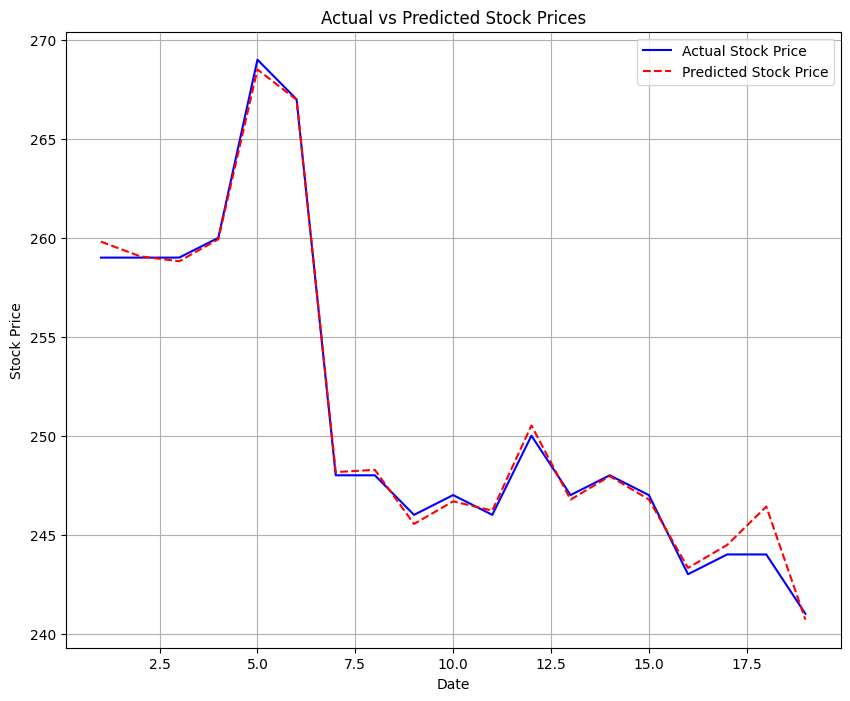

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# สร้าง DataFrame จากข้อมูลที่ให้มา
file_path = 'ADVANC.csv'
stock_data = pd.read_csv(file_path)

# สร้างฟีเจอร์ใหม่ เช่น lag features
df['Open_lag'] = df['Open'].shift(1)
df['High_lag'] = df['High'].shift(1)
df['Low_lag'] = df['Low'].shift(1)
df['Volume ()_lag'] = df['Volume ()'].shift(1)

# ลบแถวที่มีค่า NaN ที่เกิดจากการสร้างฟีเจอร์ใหม่
df.dropna(inplace=True)

# ตัวแปรอิสระ (Open, High, Low, Volume และ lag features) และตัวแปรตาม (ราคาปิด)
X = df[['Open', 'High', 'Low', 'Volume ()', 'Open_lag', 'High_lag', 'Low_lag', 'Volume ()_lag']]  # ตัวแปรอิสระ
y = df['Close']  # ตัวแปรตาม

# แบ่งข้อมูลเป็นชุด train และ test (ตามลำดับเวลา)
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# สร้างโมเดล Linear Regression
model = LinearRegression()

# ฝึกโมเดลด้วยข้อมูล training
model.fit(X_train, y_train)

# ทำนายราคาหุ้นด้วยข้อมูล test
y_pred = model.predict(X_test)

# ประเมินผลการทำนาย
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# ประเมินผลการทำนายด้วย R-squared (ค่าความแม่นยำของโมเดล)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (Accuracy): {r2:.2f}')

# คาดการณ์ราคาหุ้นสำหรับข้อมูลทั้งหมด
df['Predicted_Close'] = model.predict(X)

# เปรียบเทียบราคาจริงกับราคาคาดการณ์
df['Price_Difference'] = df['Predicted_Close'] - df['Close']

# แนะนำหุ้นที่อาจจะคุ้มค่าซื้อ
recommended_stocks = df[df['Price_Difference'] > 0]
print("หุ้นที่อาจจะคุ้มค่าซื้อ (ราคาคาดการณ์สูงกว่าราคาจริง):")
print(recommended_stocks)

# สร้างกราฟเปรียบเทียบข้อมูลจริงกับผลการทำนาย
plt.figure(figsize=(10, 8))

# กราฟข้อมูลจริง (Line Plot)
plt.plot(df.index, df['Close'], color='blue', label='Actual Stock Price')

# กราฟผลการทำนาย (Line Plot)
plt.plot(df.index, df['Predicted_Close'], color='red', label='Predicted Stock Price', linestyle='--')

# ตั้งชื่อกราฟ
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# แสดงกราฟ
plt.show()

Mean Squared Error: 1.5521604949022103
R-squared (Accuracy): 0.31
หุ้นที่อาจจะคุ้มค่าซื้อ (ราคาคาดการณ์สูงกว่าราคาจริง):
           Date   Open   High    Low  Close  Change  % Change  Volume ()  \
2   12 Sep 2024  261.0  263.0  258.0  259.0     0.0      0.00    8539014   
3   11 Sep 2024  258.0  261.0  257.0  259.0     0.0      0.00    6990838   
8   04 Sep 2024  247.0  249.0  246.0  248.0     0.0      0.00    3092819   
9   03 Sep 2024  245.0  249.0  245.0  248.0     2.0      0.81    4370379   
12  29 Aug 2024  250.0  251.0  245.0  246.0    -4.0     -1.60    7526761   
13  28 Aug 2024  247.0  252.0  247.0  250.0     3.0      1.21    8053727   
15  26 Aug 2024  246.0  249.0  245.0  248.0     1.0      0.40    4374447   
17  22 Aug 2024  244.0  246.0  241.0  243.0    -1.0     -0.41    4965965   
18  21 Aug 2024  245.0  246.0  243.0  244.0     0.0      0.00    2804097   
19  20 Aug 2024  241.0  246.0  241.0  244.0     3.0      1.24    6031015   

     Value (')  Open_lag  High_lag  Low_la

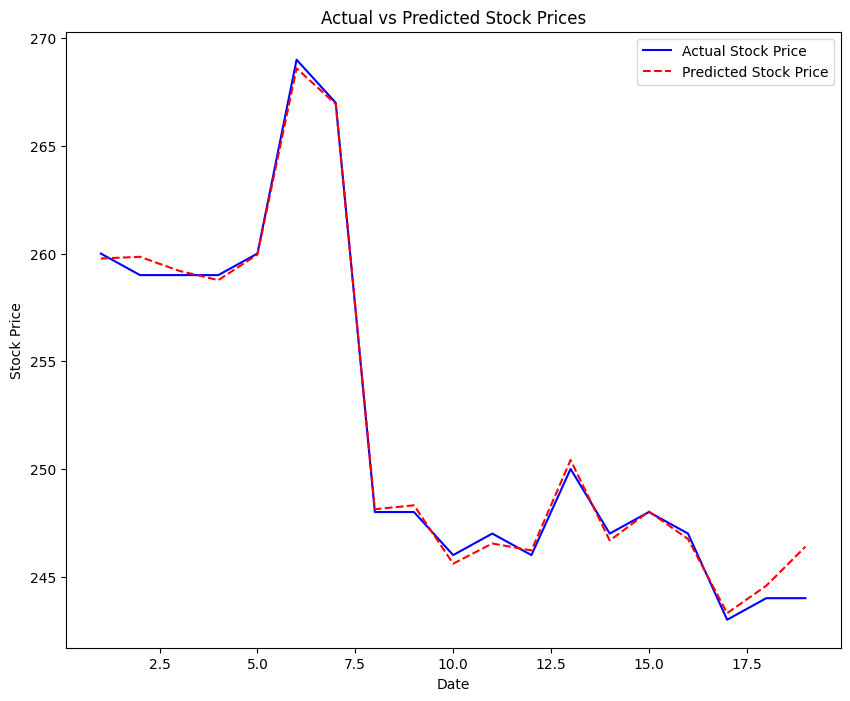

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# สร้าง DataFrame จากข้อมูลที่ให้มา
file_path = 'ADVANC.csv'
stock_data = pd.read_csv(file_path)

# สร้างฟีเจอร์ใหม่ เช่น lag features
df['Open_lag'] = df['Open'].shift(1)
df['High_lag'] = df['High'].shift(1)
df['Low_lag'] = df['Low'].shift(1)
df['Volume ()_lag'] = df['Volume ()'].shift(1)

# ลบแถวที่มีค่า NaN ที่เกิดจากการสร้างฟีเจอร์ใหม่
df.dropna(inplace=True)

# ตัวแปรอิสระ (Open, High, Low, Volume และ lag features) และตัวแปรตาม (ราคาปิด)
X = df[['Open', 'High', 'Low', 'Volume ()', 'Open_lag', 'High_lag', 'Low_lag', 'Volume ()_lag']]  # ตัวแปรอิสระ
y = df['Close']  # ตัวแปรตาม

# แบ่งข้อมูลเป็นชุด train และ test (ตามลำดับเวลา)
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# สร้างโมเดล Linear Regression
model = LinearRegression()

# ฝึกโมเดลด้วยข้อมูล training
model.fit(X_train, y_train)

# ทำนายราคาหุ้นด้วยข้อมูล test
y_pred = model.predict(X_test)

# ประเมินผลการทำนาย
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# ประเมินผลการทำนายด้วย R-squared (ค่าความแม่นยำของโมเดล)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (Accuracy): {r2:.2f}')

# คาดการณ์ราคาหุ้นสำหรับข้อมูลทั้งหมด
df['Predicted_Close'] = model.predict(X)

# เปรียบเทียบราคาจริงกับราคาคาดการณ์
df['Price_Difference'] = df['Predicted_Close'] - df['Close']

# แนะนำหุ้นที่อาจจะคุ้มค่าซื้อ
recommended_stocks = df[df['Price_Difference'] > 0]
print("หุ้นที่อาจจะคุ้มค่าซื้อ (ราคาคาดการณ์สูงกว่าราคาจริง):")
print(recommended_stocks)

# สร้างกราฟเปรียบเทียบข้อมูลจริงกับผลการทำนาย
plt.figure(figsize=(10, 8))

# กราฟข้อมูลจริง (Line Plot)
plt.plot(df.index, df['Close'], color='blue', label='Actual Stock Price')

# กราฟผลการทำนาย (Line Plot)
plt.plot(df.index, df['Predicted_Close'], color='red', label='Predicted Stock Price', linestyle='--')

# ตั้งชื่อกราฟ
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# แสดงกราฟ
plt.show()

Mean Squared Error: 1.5521604949022103
R-squared (Accuracy): 0.31
หุ้นที่อาจจะคุ้มค่าซื้อ (ราคาคาดการณ์สูงกว่าราคาจริง):
           Date   Open   High    Low  Close  Change  % Change  Volume ()  \
2   12 Sep 2024  261.0  263.0  258.0  259.0     0.0      0.00    8539014   
3   11 Sep 2024  258.0  261.0  257.0  259.0     0.0      0.00    6990838   
8   04 Sep 2024  247.0  249.0  246.0  248.0     0.0      0.00    3092819   
9   03 Sep 2024  245.0  249.0  245.0  248.0     2.0      0.81    4370379   
12  29 Aug 2024  250.0  251.0  245.0  246.0    -4.0     -1.60    7526761   
13  28 Aug 2024  247.0  252.0  247.0  250.0     3.0      1.21    8053727   
15  26 Aug 2024  246.0  249.0  245.0  248.0     1.0      0.40    4374447   
17  22 Aug 2024  244.0  246.0  241.0  243.0    -1.0     -0.41    4965965   
18  21 Aug 2024  245.0  246.0  243.0  244.0     0.0      0.00    2804097   
19  20 Aug 2024  241.0  246.0  241.0  244.0     3.0      1.24    6031015   

     Value (')  Open_lag  High_lag  Low_la

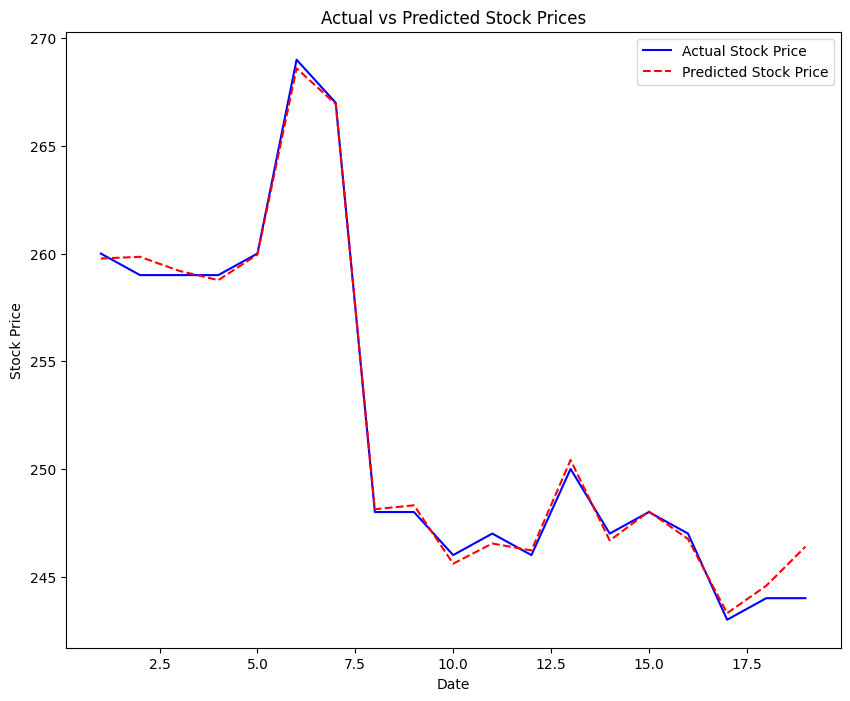

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# สร้าง DataFrame จากข้อมูลที่ให้มา
file_path = 'ADVANC.csv'
stock_data = pd.read_csv(file_path)

# สร้างฟีเจอร์ใหม่ เช่น lag features
df['Open_lag'] = df['Open'].shift(1)
df['High_lag'] = df['High'].shift(1)
df['Low_lag'] = df['Low'].shift(1)
df['Volume ()_lag'] = df['Volume ()'].shift(1)

# ลบแถวที่มีค่า NaN ที่เกิดจากการสร้างฟีเจอร์ใหม่
df.dropna(inplace=True)

# ตัวแปรอิสระ (Open, High, Low, Volume และ lag features) และตัวแปรตาม (ราคาปิด)
X = df[['Open', 'High', 'Low', 'Volume ()', 'Open_lag', 'High_lag', 'Low_lag', 'Volume ()_lag']]  # ตัวแปรอิสระ
y = df['Close']  # ตัวแปรตาม

# แบ่งข้อมูลเป็นชุด train และ test (ตามลำดับเวลา)
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# สร้างโมเดล Linear Regression
model = LinearRegression()

# ฝึกโมเดลด้วยข้อมูล training
model.fit(X_train, y_train)

# ทำนายราคาหุ้นด้วยข้อมูล test
y_pred = model.predict(X_test)

# ประเมินผลการทำนาย
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# ประเมินผลการทำนายด้วย R-squared (ค่าความแม่นยำของโมเดล)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (Accuracy): {r2:.2f}')

# คาดการณ์ราคาหุ้นสำหรับข้อมูลทั้งหมด
df['Predicted_Close'] = model.predict(X)

# เปรียบเทียบราคาจริงกับราคาคาดการณ์
df['Price_Difference'] = df['Predicted_Close'] - df['Close']

# แนะนำหุ้นที่อาจจะคุ้มค่าซื้อ
recommended_stocks = df[df['Price_Difference'] > 0]
print("หุ้นที่อาจจะคุ้มค่าซื้อ (ราคาคาดการณ์สูงกว่าราคาจริง):")
print(recommended_stocks)

# สร้างกราฟเปรียบเทียบข้อมูลจริงกับผลการทำนาย
plt.figure(figsize=(10, 8))

# กราฟข้อมูลจริง (Line Plot)
plt.plot(df.index, df['Close'], color='blue', label='Actual Stock Price')

# กราฟผลการทำนาย (Line Plot)
plt.plot(df.index, df['Predicted_Close'], color='red', label='Predicted Stock Price', linestyle='--')

# ตั้งชื่อกราฟ
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# แสดงกราฟ
plt.show()

In [ ]:
import pickle

# บันทึกโมเดล
with open('regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)
